# Data Dictionary:
* Company: Laptop Manufacturer.
* Product: Brand and Model.
* TypeName: Laptop Type (Notebook, Ultrabook, Gaming, …etc).
* Inches: Screen Size.
* Ram: Total amount of RAM in laptop (GBs).
* OS: Operating System installed.
* Weight: Laptop Weight in kilograms.
* Price_euros: Price of Laptop in Euros. (Target)
* Screen: screen definition (Standard, Full HD, 4K Ultra HD, Quad HD+).
* ScreenW: screen width (pixels).
* ScreenH: screen height (pixels).
* Touchscreen: whether or not the laptop has a touchscreen.
* IPSpanel: whether or not the laptop has an IPSpanel.
* RetinaDisplay: whether or not the laptop has retina display.
* CPU_company
* CPU_freq: frequency of laptop CPU (Hz).
* CPU_model
* PrimaryStorage: primary storage space (GB).
* PrimaryStorageType: primary storage type (HDD, SSD, Flash Storage, Hybrid).
* SecondaryStorage: secondary storage space if any (GB).
* SecondaryStorageType: secondary storage type (HDD, SSD, Hybrid, None).
* GPU_company
* GPU_model 

In [1]:
import zipfile
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## **Unzipping and loading dataset** ##

In [2]:
zip_path = '/Users/scott/Desktop/archive.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    dataset = 'laptop_prices.csv'
    with zip_ref.open(dataset) as file:
        data = pd.read_csv(file)

## Confirming proper unzip & read ##

In [3]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


## Checking size of dataset, dtypes, & missing values ##

In [4]:
print('# of rows in dataset: ', data.shape[0])
print('# of cols in dataset: ', data.shape[1])
print('*'*50)
data.info()

# of rows in dataset:  1275
# of cols in dataset:  23
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay     

## Descriptive statistics of numerical columns

In [5]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


# Exploratory Data Analysis

## Univariate Analysis

**TypeName**

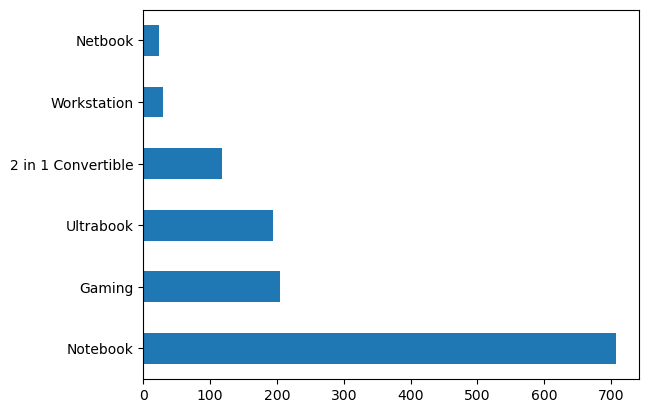

In [6]:
data['TypeName'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

**Company**

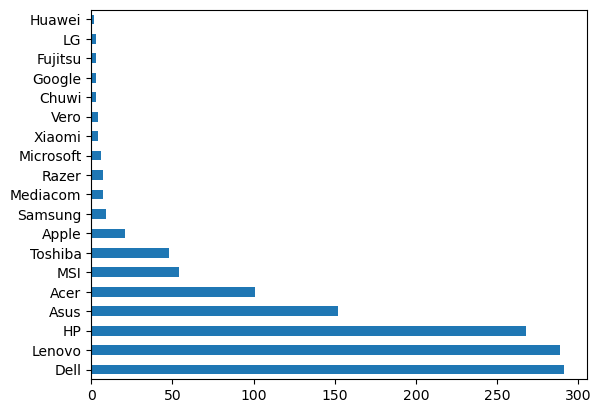

In [7]:
data['Company'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

**Operating System**

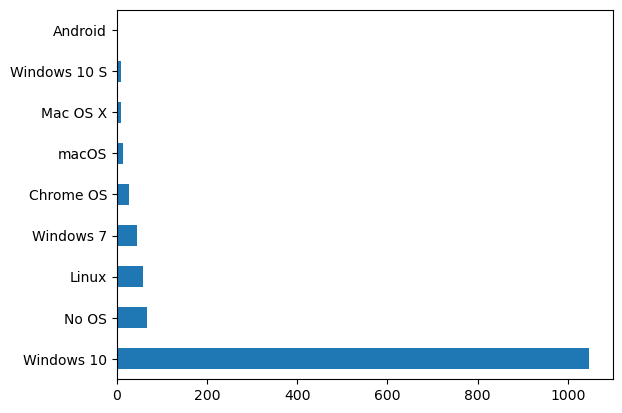

In [8]:
data['OS'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

**Screen**

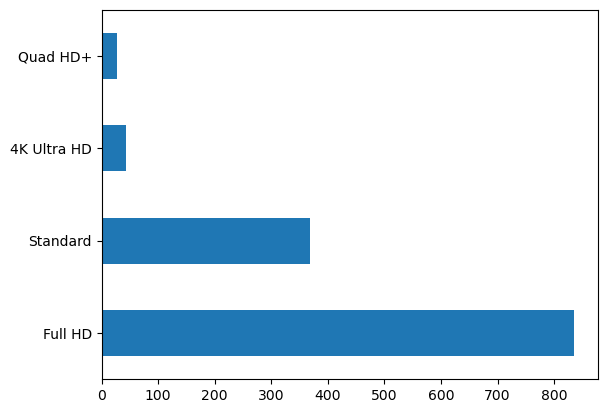

In [9]:
data['Screen'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

**CPU**

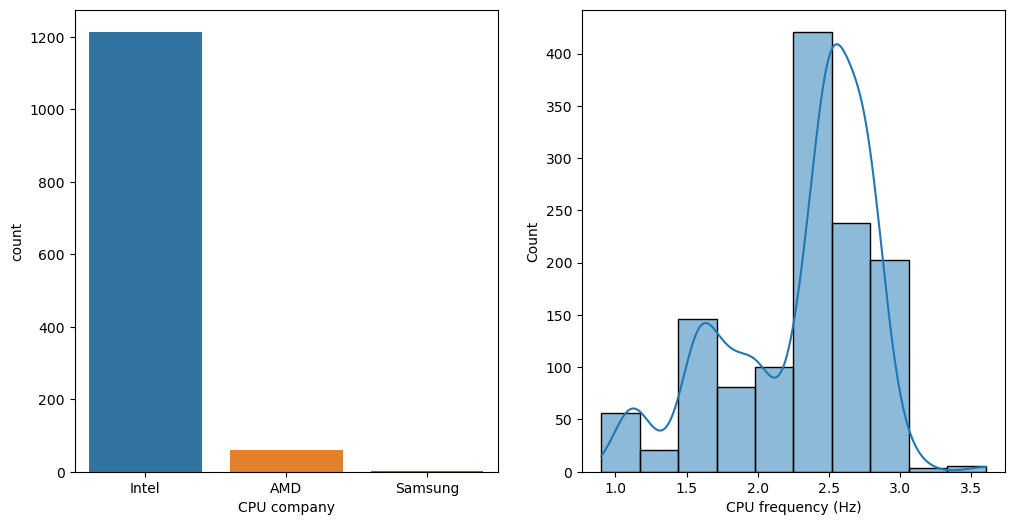

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='CPU_company')
plt.xlabel('CPU company')
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='CPU_freq', kde=True, bins=10)
plt.xlabel('CPU frequency (Hz)')
plt.show()

**Storage**

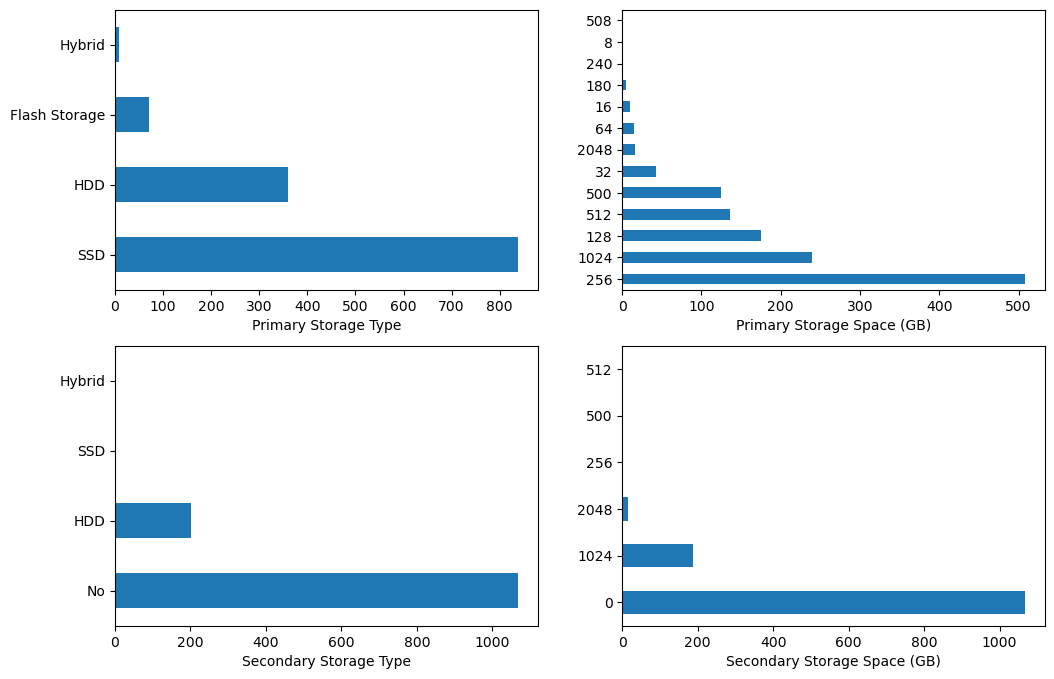

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
data['PrimaryStorageType'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Primary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 2)
data['PrimaryStorage'].value_counts().sort_values(ascending = False).plot(kind='barh')
plt.xlabel('Primary Storage Space (GB)')
plt.subplot(2, 2, 3)

data['SecondaryStorageType'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Secondary Storage Type')
plt.ylabel('')
plt.subplot(2, 2, 4)
data['SecondaryStorage'].value_counts().sort_values(ascending = False).plot(kind='barh')
plt.xlabel('Secondary Storage Space (GB)')

plt.show()

**RAM**

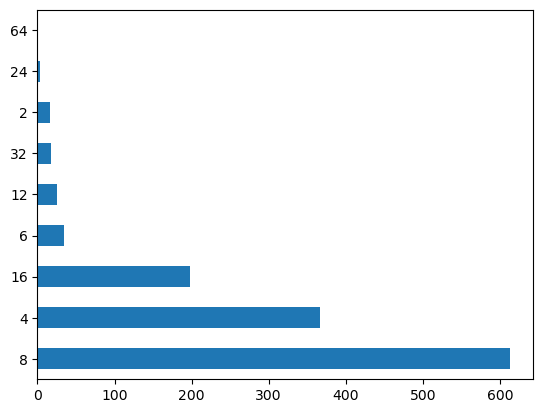

In [12]:
data['Ram'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

**GPU Company**

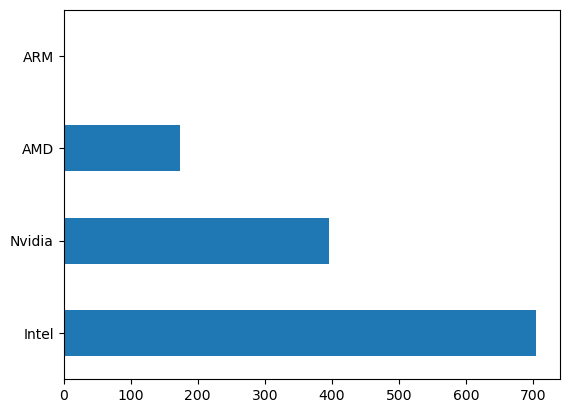

In [13]:
data['GPU_company'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

**Weight**

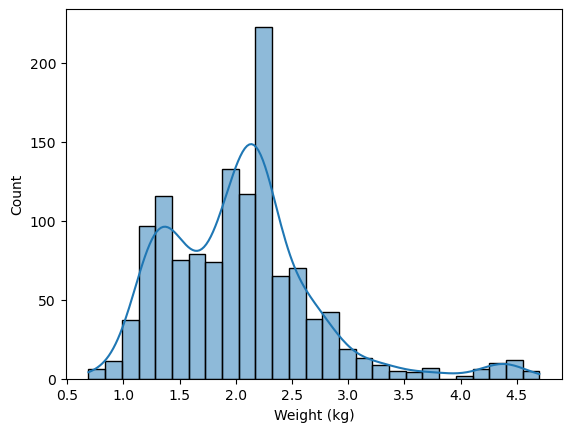

In [14]:
sns.histplot(data, x='Weight', kde=True)
plt.xlabel('Weight (kg)')
plt.show()

**Screen Size**

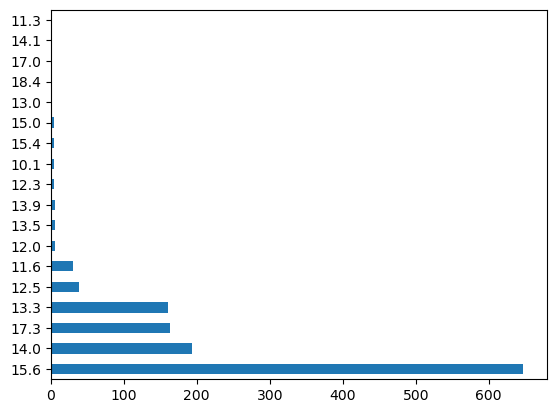

In [15]:
data['Inches'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

**Display & Features**

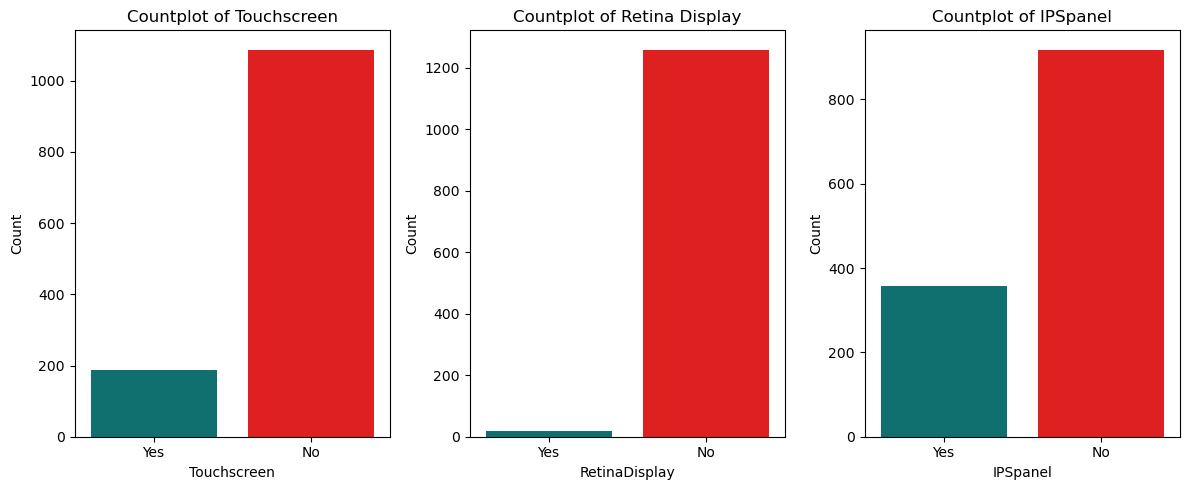

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
palette = {'Yes': 'teal', 'No': 'red'}

sns.countplot(x='Touchscreen', data=data, ax=axes[0],palette=palette, order = ['Yes', 'No'])
axes[0].set_title('Countplot of Touchscreen')
axes[0].set_ylabel('Count')

# Countplot for Category2
sns.countplot(x='RetinaDisplay', data=data, ax=axes[1],palette=palette)
axes[1].set_title('Countplot of Retina Display')
axes[1].set_ylabel('Count')

sns.countplot(x='IPSpanel', data=data, ax=axes[2],palette=palette)
axes[2].set_title('Countplot of IPSpanel')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
data['Touchscreen'].value_counts()

No     1087
Yes     188
Name: Touchscreen, dtype: int64

**Price**

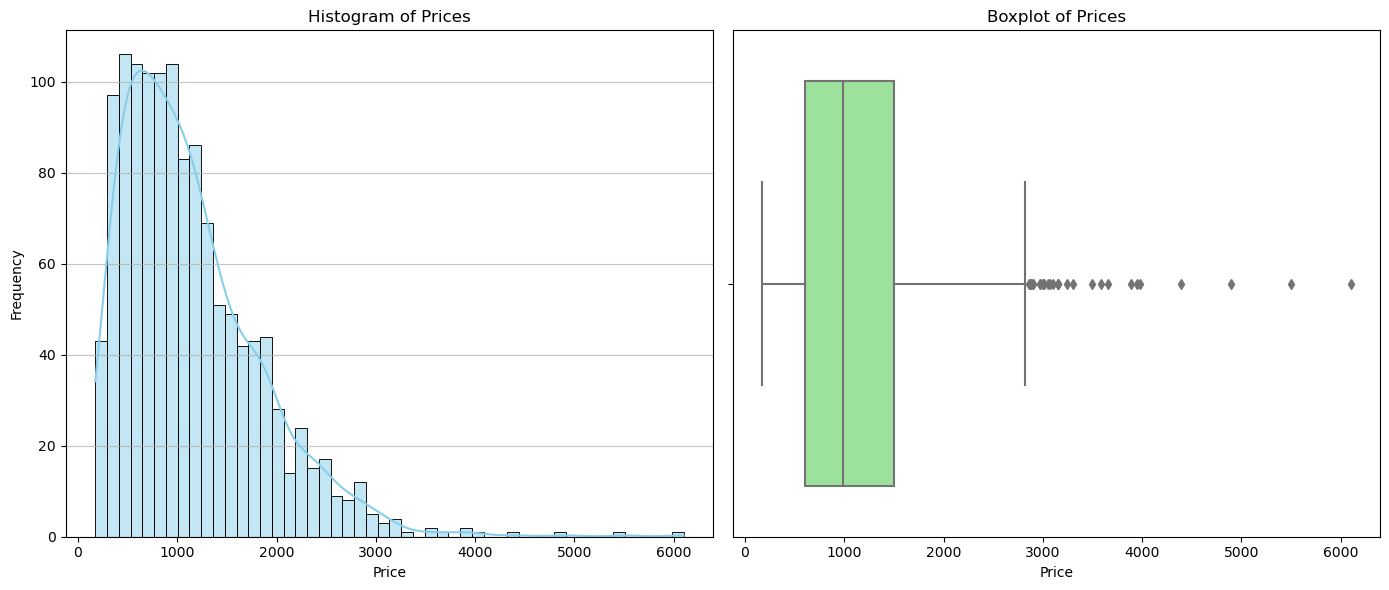

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data['Price_euros'], bins=50, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Histogram of Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.75)

sns.boxplot(x=data['Price_euros'], ax=ax2, color='lightgreen')
ax2.set_title('Boxplot of Prices')
ax2.set_xlabel('Price')

plt.tight_layout()
plt.show()

**Top 10 most popular Products and GPUs**

In [19]:
print('The 10 most popular products are: \n\n',data['Product'].value_counts().head(10))
print('*'*50)
print('\nThe 10 most popular GPUs are: \n\n', data['GPU_model'].value_counts().head(10))

The 10 most popular products are: 

 XPS 13                30
Inspiron 3567         25
250 G6                21
Vostro 3568           19
Legion Y520-15IKBN    19
ProBook 450           18
Inspiron 5570         18
Alienware 17          15
Inspiron 5567         14
Satellite Pro         13
Name: Product, dtype: int64
**************************************************

The 10 most popular GPUs are: 

 HD Graphics 620     279
HD Graphics 520     181
UHD Graphics 620     68
GeForce GTX 1050     66
GeForce GTX 1060     48
GeForce 940MX        43
Radeon 530           41
HD Graphics 500      39
HD Graphics 400      33
GeForce GTX 1070     30
Name: GPU_model, dtype: int64


## Bivariate Analysis

## Count of TypeName by Company

<AxesSubplot:xlabel='Company', ylabel='Count'>

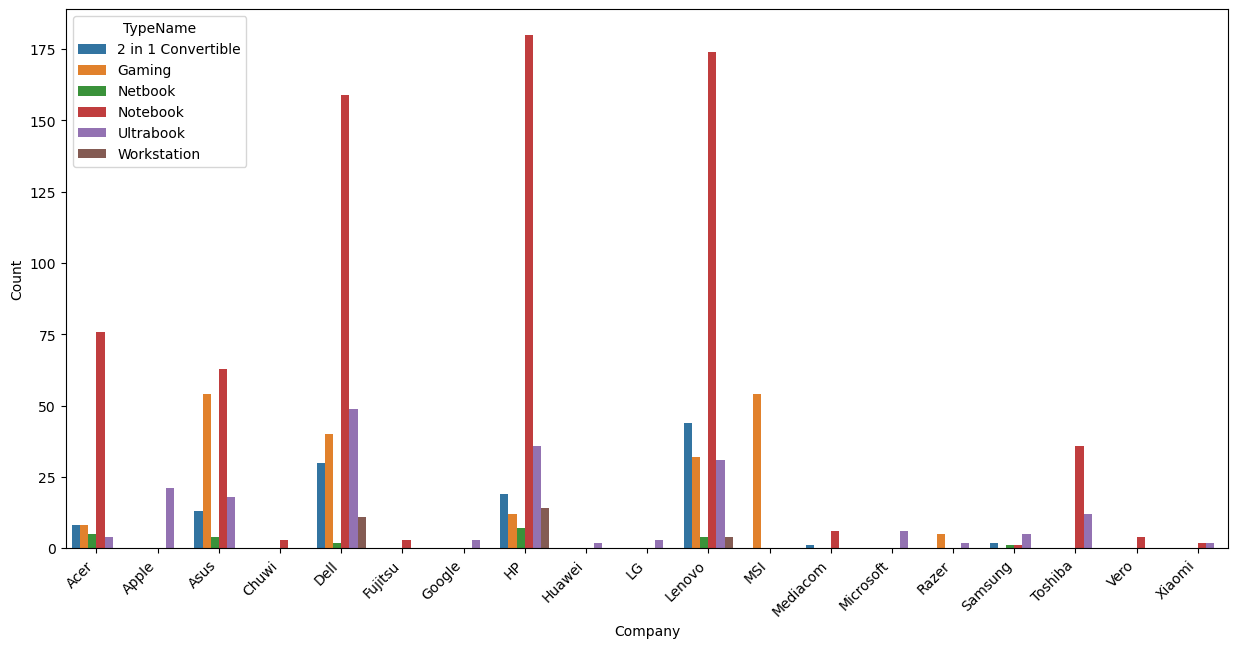

In [20]:
count_data = data.groupby(['Company', 'TypeName']).size().reset_index(name='Count')
plt.figure(figsize=(15, 7))
plt.xticks(rotation=45, ha='right')
sns.barplot(data=count_data, x='Company', y='Count', hue='TypeName')

## Price distribution by TypeName

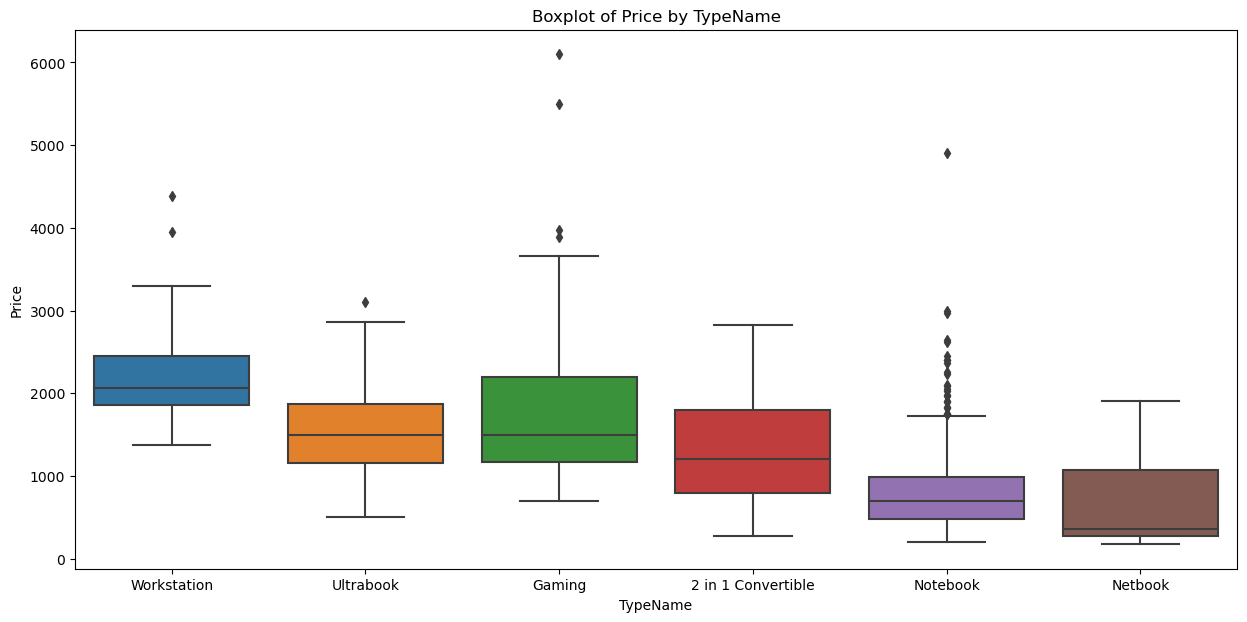

In [21]:
median_prices = data.groupby('TypeName')['Price_euros'].median().sort_values(ascending = False)
plt.figure(figsize = (15,7))

sns.boxplot(x='TypeName', y='Price_euros', data=data, order = median_prices.index)
plt.title('Boxplot of Price by TypeName')
plt.xlabel('TypeName')
plt.ylabel('Price')
plt.show()

## Price distribution by Company

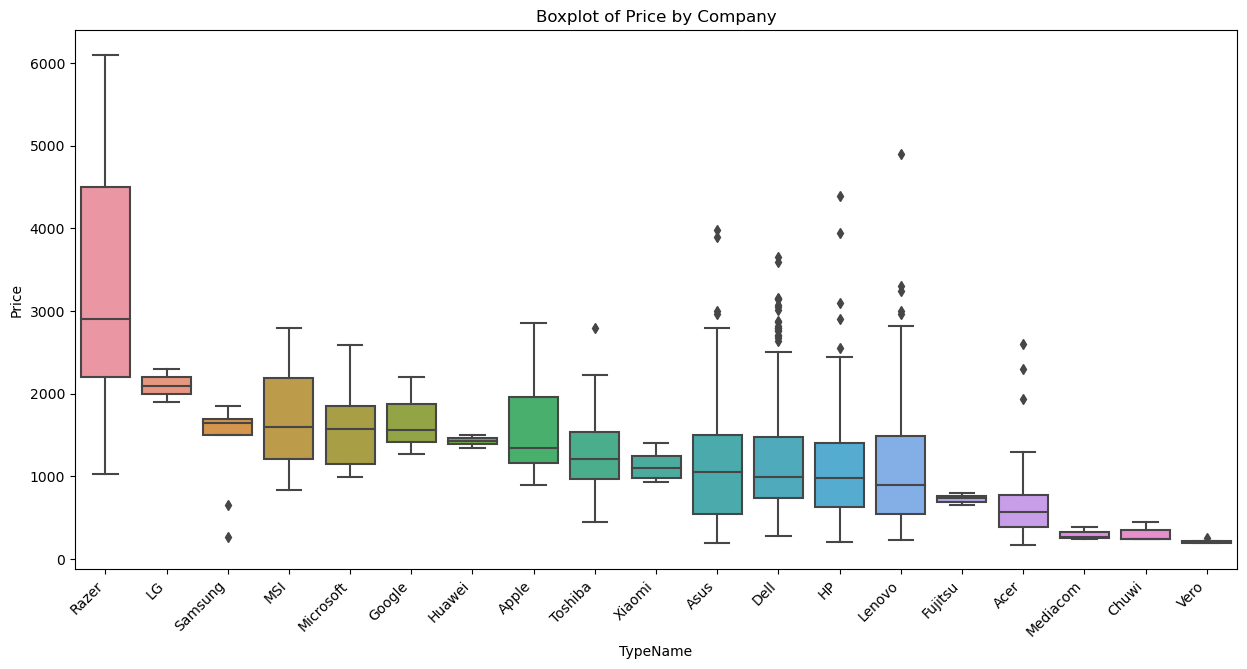

In [22]:
median_prices1 = data.groupby('Company')['Price_euros'].median().sort_values(ascending = False)

plt.figure(figsize = (15,7))

sns.boxplot(x='Company', y='Price_euros', data=data, order=median_prices1.index)
plt.title('Boxplot of Price by Company')
plt.xticks(rotation=45, ha='right')
plt.xlabel('TypeName')
plt.ylabel('Price')
plt.show()

## Price distribution of 10 most popular Product ##

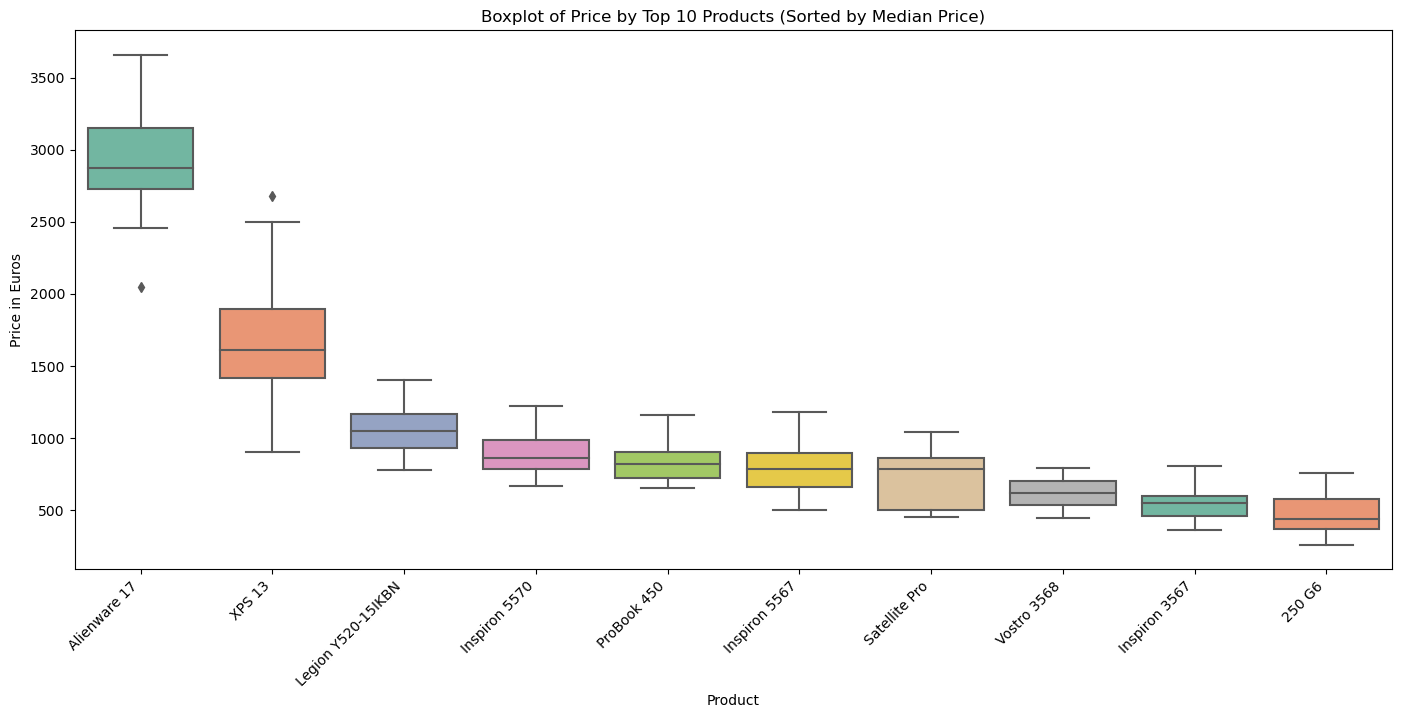

In [23]:
top_products = data['Product'].value_counts().nlargest(10).index.tolist()
filtered_df = data[data['Product'].isin(top_products)]

median_prices = filtered_df.groupby('Product')['Price_euros'].median()
sorted_top_products = median_prices.sort_values(ascending = False).index.tolist()

plt.figure(figsize=(17, 7))
sns.boxplot(x='Product', y='Price_euros', data=filtered_df, order=sorted_top_products, palette='Set2')
plt.title('Boxplot of Price by Top 10 Products (Sorted by Median Price)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product')
plt.ylabel('Price in Euros')

plt.show()

## Price distribution of 10 most popular GPU models ##

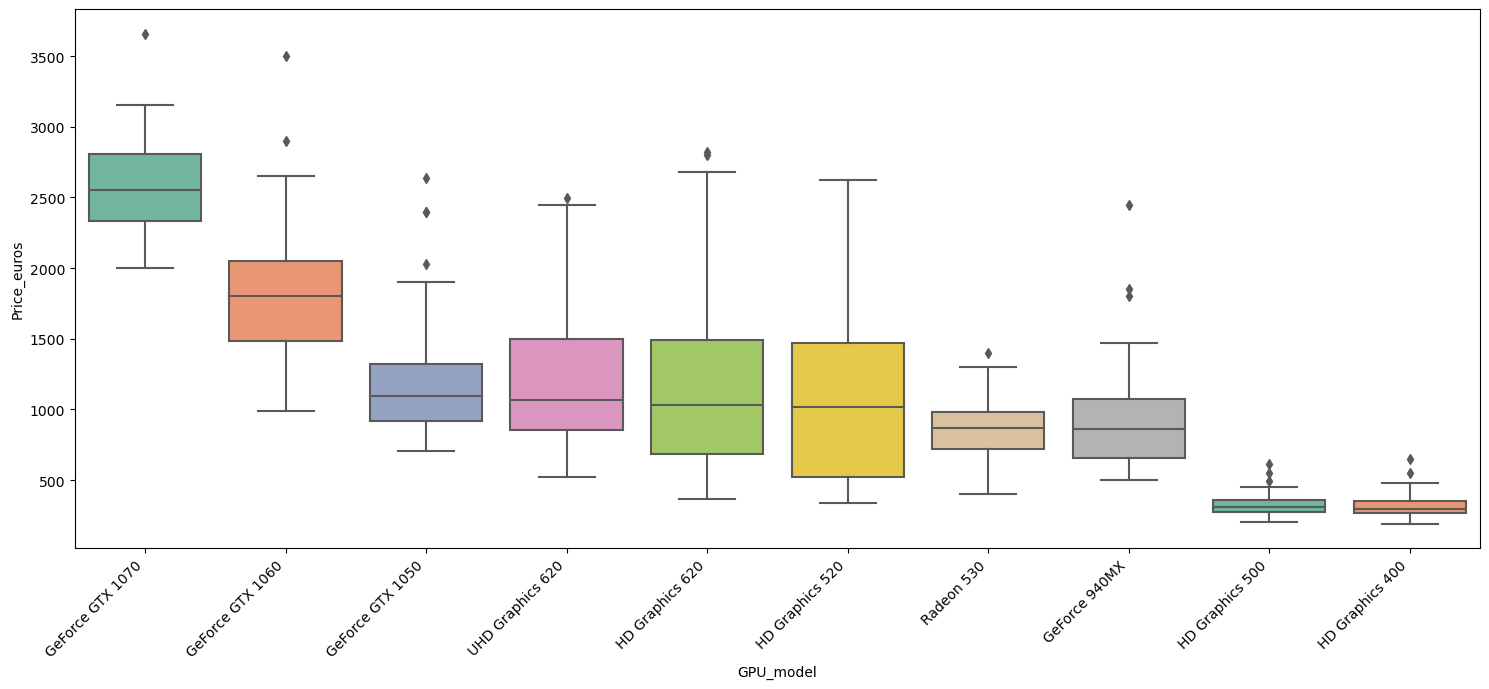

In [24]:
top_products = data['GPU_model'].value_counts().nlargest(10).index.tolist()
filtered_df = data[data['GPU_model'].isin(top_products)]

median_prices = filtered_df.groupby('GPU_model')['Price_euros'].median()
sorted_top_products = median_prices.sort_values(ascending = False).index.tolist()

plt.figure(figsize=(15,7))
sns.boxplot(x='GPU_model', y='Price_euros', data=filtered_df, order=sorted_top_products, palette='Set2')
axes[0].set_title('Boxplot of Price by Top 10 GPU models (Sorted by Median Price)')
plt.xticks(rotation=45, ha='right')

axes[0].set_xlabel('GPU_model')
axes[0].set_ylabel('Price in Euros')

plt.tight_layout()
plt.show()

## Median Price distribution of Screen ##

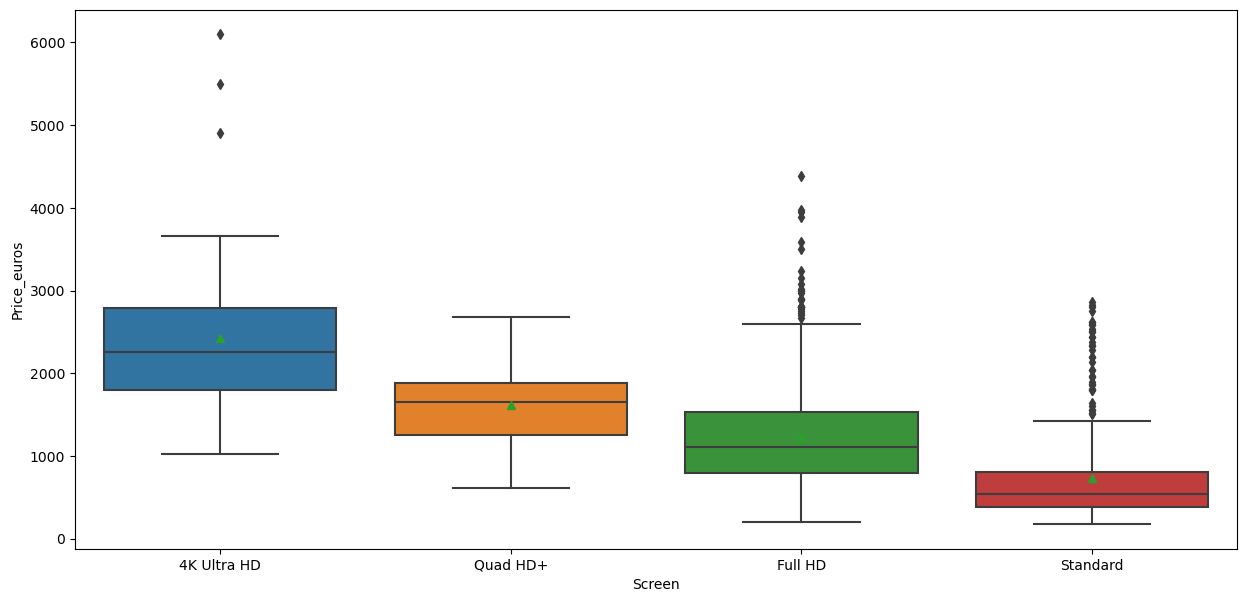

In [25]:
median_prices = data.groupby('Screen')['Price_euros'].median()
sorted_screens = median_prices.sort_values(ascending = False).index.tolist()


plt.figure(figsize=(15,7))
sns.boxplot(x='Screen',y='Price_euros',data=data, order = sorted_screens, showmeans=True)
plt.show()

## Price distribution of CPU speed ##

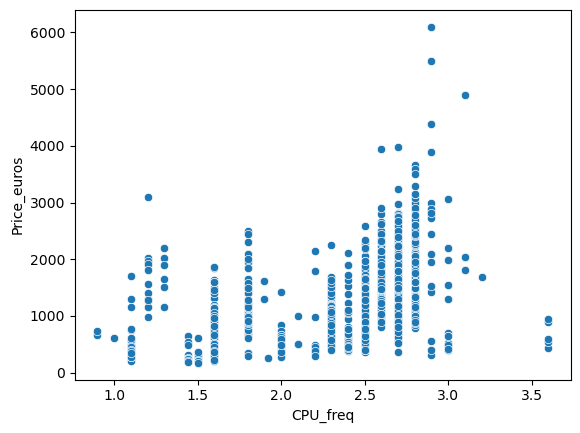

In [26]:
sns.scatterplot(x='CPU_freq', y='Price_euros',data=data)
plt.show()

## Median Price distribution of RAM ##

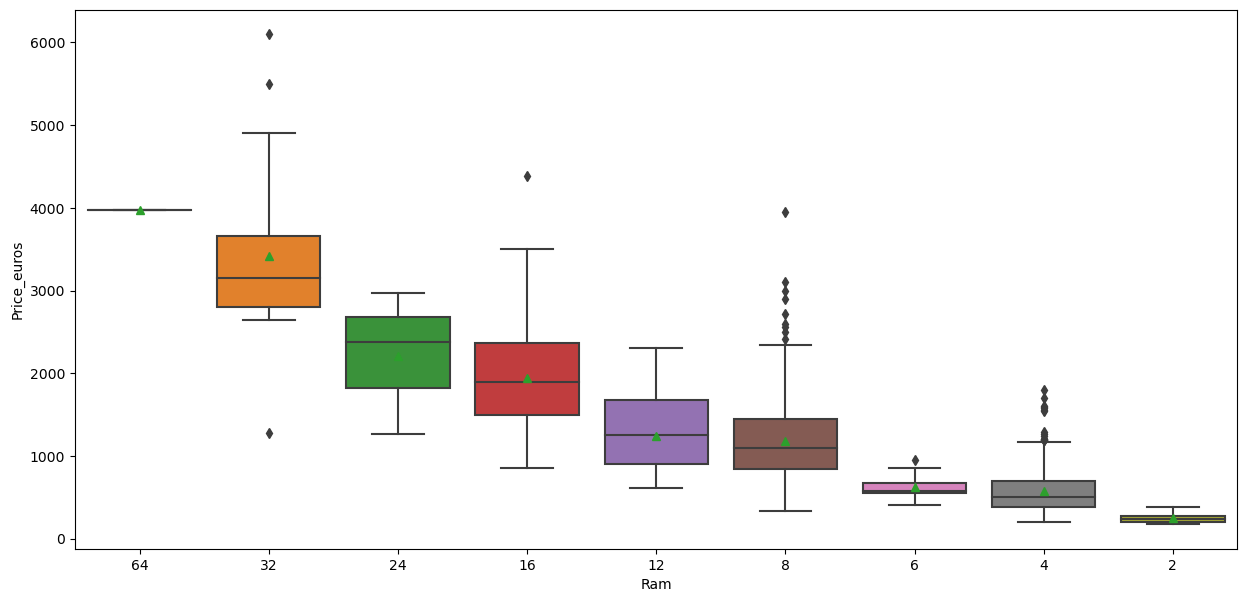

In [27]:
median_prices = data.groupby('Ram')['Price_euros'].median()
sorted_screens = median_prices.sort_values(ascending = False).index.tolist()


plt.figure(figsize=(15,7))
sns.boxplot(x='Ram',y='Price_euros',data=data, order = sorted_screens,showmeans=True)
plt.show()

## Median Price distribution of Screen Resolution ##

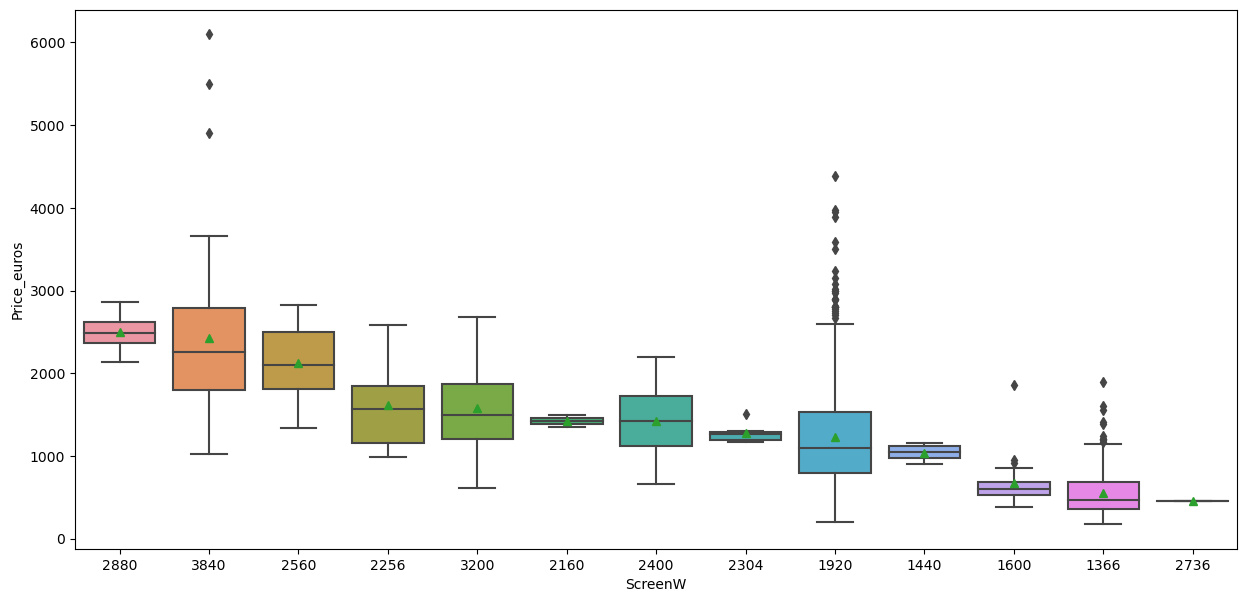

In [28]:
median_prices = data.groupby('ScreenW')['Price_euros'].median()
sorted_screens = median_prices.sort_values(ascending = False).index.tolist()


plt.figure(figsize=(15,7))
sns.boxplot(x='ScreenW',y='Price_euros',data=data, order = sorted_screens,showmeans=True)
plt.show()

## Median Price distribution of Storage Capacity ##

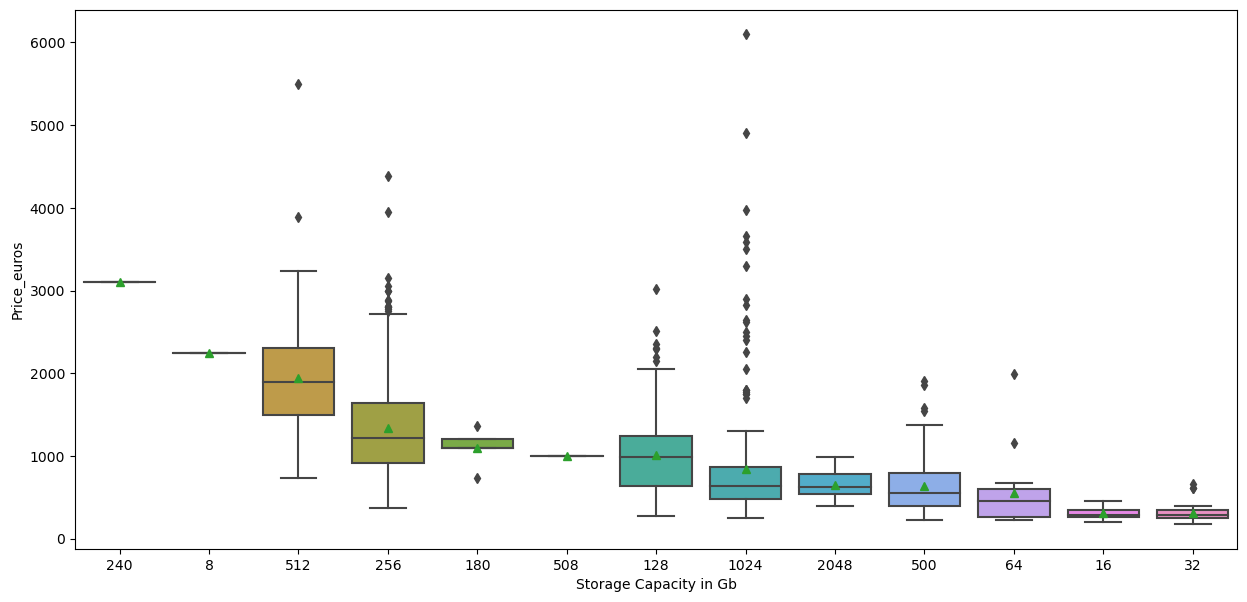

In [29]:
median_prices = data.groupby('PrimaryStorage')['Price_euros'].median()
sorted_screens = median_prices.sort_values(ascending = False).index.tolist()


plt.figure(figsize=(15,7))
sns.boxplot(x='PrimaryStorage',y='Price_euros',data=data, order = sorted_screens, showmeans=True)
plt.xlabel('Storage Capacity in Gb')
plt.show()

## Median Price distribution of Storage Type ##

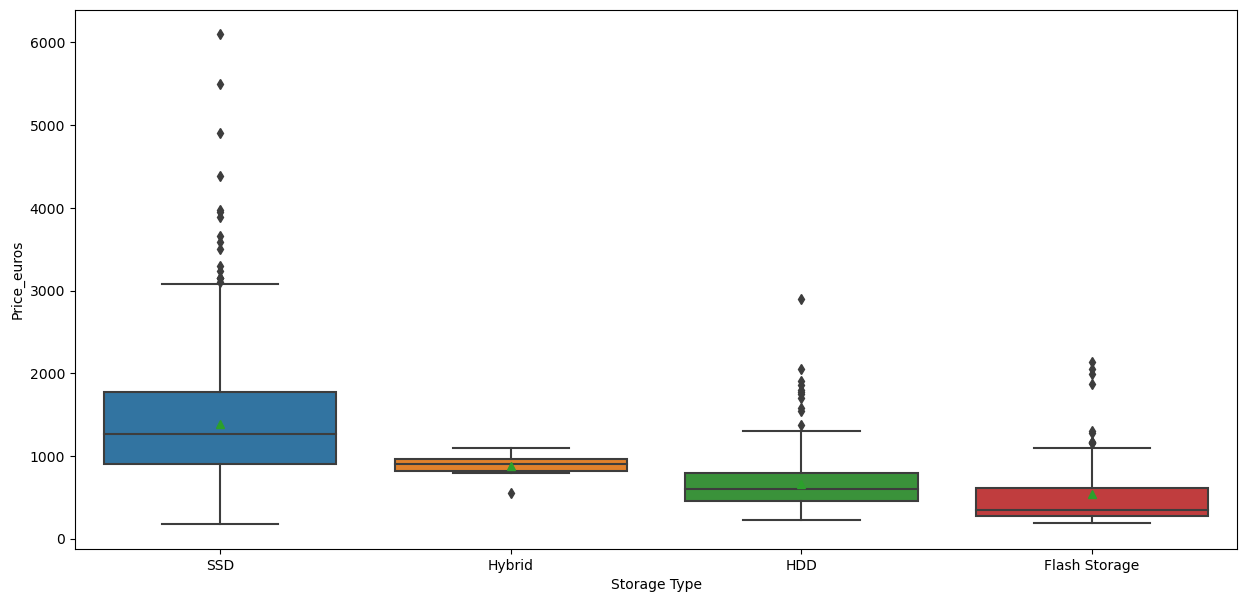

In [30]:
median_prices = data.groupby('PrimaryStorageType')['Price_euros'].median()
sorted_screens = median_prices.sort_values(ascending = False).index.tolist()


plt.figure(figsize=(15,7))
sns.boxplot(x='PrimaryStorageType',y='Price_euros',data=data, order = sorted_screens, showmeans=True)
plt.xlabel('Storage Type')
plt.show()

## Storage Type and Storage Capacity ##

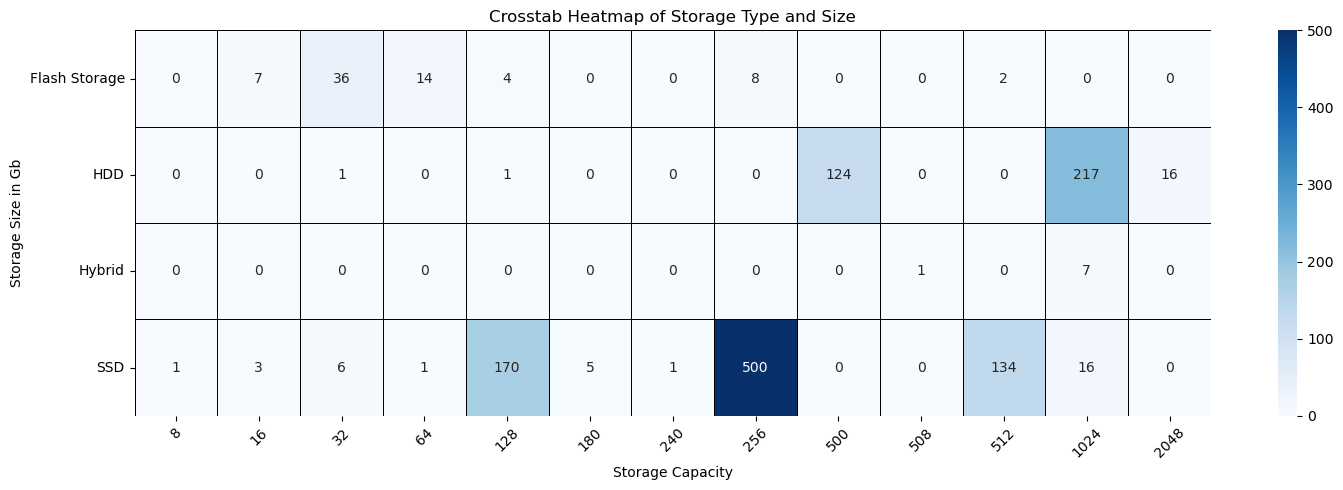

In [31]:
crosstab = pd.crosstab(data['PrimaryStorageType'], data['PrimaryStorage'])

plt.figure(figsize=(15, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5, linecolor='black')

plt.title('Crosstab Heatmap of Storage Type and Size')
plt.xlabel('Storage Capacity')
plt.ylabel('Storage Size in Gb')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Machine Learning Models ##

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
encoder= LabelEncoder()
for col in data.columns:
    if data[col].dtype=="O":
        data[col]= encoder.fit_transform(data[col])
del(encoder)

In [34]:
X = data.drop(['Price_euros'], axis=1)
y = data['Price_euros']

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(
    f'X_train shape: {X_train.shape}\n'+
    f'y_train shape: {y_train.shape}\n'+
    f'X_test shape:  {X_test.shape}\n'+
    f'y_test shape:  {y_test.shape}'
)

X_train shape: (1020, 22)
y_train shape: (1020,)
X_test shape:  (255, 22)
y_test shape:  (255,)


In [36]:
def model_report(model, verbose=True):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    trainScore = model.score(X_train, y_train)
    testScore = model.score(X_test, y_test)
    r2Score = r2_score(y_test, y_pred)
    absoluteError = mean_absolute_error(y_test, y_pred)
    squaredError = mean_squared_error(y_test, y_pred)

    if verbose:
        print('Train Score: %f'%trainScore)
        print('Test Score:  %f'%testScore)
        print('R2 Score:    %f'%r2Score)
        print('Mean Absolute Error: %f'%absoluteError)
        print('Mean Absolute Error: %f'%squaredError)
        plt.scatter(y_pred, y_test)
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values')
        plt.show()
        print()

    return {
        'train':    trainScore,
        'test':     testScore,
        'r2score':  r2Score,
        'absolute': absoluteError,
        'squared':  squaredError,
    }

In [37]:
models_dict= {
    'LinearRegression':      LinearRegression(),
    'Lasso':                 Lasso(),
    'Ridge':                 Ridge(),
    'KNeighborsRegressor':   KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'BaggingRegressor':      BaggingRegressor(),
    'ExtraTreesRegressor':   ExtraTreesRegressor(),
    'AdaBoostRegressor':     AdaBoostRegressor(),
    'XGBRegressor':          XGBRegressor(),
}
models= [{'name':k, 'obj':v} for k,v in models_dict.items()]

i= 0
for model in models:
        print("Evaluating %s..."%model['name'])
        print("%d/%d models"%(i, len(models)), end='\r')
        model.update(model_report(model['obj'], verbose=False))
        i+= 1
print("%d/%d models evaluated"%(i, len(models)))
print("done")

Evaluating LinearRegression...
Evaluating Lasso...
Evaluating Ridge...
Evaluating KNeighborsRegressor...
Evaluating DecisionTreeRegressor...
Evaluating RandomForestRegressor...
Evaluating BaggingRegressor...
Evaluating ExtraTreesRegressor...
Evaluating AdaBoostRegressor...
Evaluating XGBRegressor...
10/10 models evaluated
done


In [39]:
pd.DataFrame({
    'Algorithm':           [model['name']     for model in models],
    'Train Score':         [model['train']    for model in models],
    'Test Score':          [model['test']     for model in models], #same as R2 score
    'Mean Absolute Error': [model['absolute'] for model in models],
    'Mean Squared Error':  [model['squared']  for model in models],
}).set_index('Algorithm').sort_values(by='Test Score', ascending=False)

,Train Score,Test Score,Mean Absolute Error,Mean Squared Error
Algorithm,,,,
XGBRegressor,0.997401,0.898481,148.461867,50388.011425
ExtraTreesRegressor,0.999651,0.877062,167.296664,61019.157968
RandomForestRegressor,0.977271,0.873295,159.137646,62888.554010
BaggingRegressor,0.968652,0.872991,163.741564,63039.318331
LinearRegression,0.721759,0.741752,257.812946,128178.690557
Ridge,0.721746,0.741734,257.885390,128187.371004
Lasso,0.721179,0.741346,259.253596,128379.963119
DecisionTreeRegressor,0.999651,0.719194,236.933451,139375.091411
AdaBoostRegressor,0.693270,0.707296,326.846652,145280.731833
